# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-31 06:00:56.950535


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/30/20


,10/30/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,9044255,229686,2.54
Brazil,5516658,159477,2.89
India,8137119,121641,1.49
Mexico,918811,91289,9.94
United Kingdom,992874,46319,4.67
Italy,647674,38321,5.92
France,1377347,36605,2.66


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/30/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
49522,US,8856413,2020-10-28,227685.0,989.0,78358.0,74110.428571
49521,US,8778055,2020-10-27,226696.0,986.0,73632.0,71884.428571
49520,US,8704423,2020-10-26,225710.0,477.0,66798.0,69987.714286
49519,US,8637625,2020-10-25,225233.0,340.0,60807.0,68787.285714
49518,US,8576818,2020-10-24,224893.0,914.0,83730.0,66989.571429
49517,US,8493088,2020-10-23,223979.0,943.0,83747.0,63249.142857
49516,US,8409341,2020-10-22,223036.0,856.0,71701.0,61166.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/30/20


,10/30/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,505431,33506.0,6.63
Texas,924447,18385.0,1.99
California,928028,17618.0,1.90
Florida,800216,16720.0,2.09
New Jersey,236523,16339.0,6.91
Illinois,408648,9994.0,2.45
Massachusetts,157146,9975.0,6.35


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/30/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1695,California,919276,2020-10-28,17529.0,69.0,4388.0,4619.571429
1694,California,914888,2020-10-27,17460.0,74.0,4450.0,4448.857143
1693,California,910438,2020-10-26,17386.0,28.0,3842.0,4399.000000
1692,California,906596,2020-10-25,17358.0,15.0,2912.0,4414.857143
1691,California,903684,2020-10-24,17343.0,38.0,4885.0,4295.714286
1690,California,898799,2020-10-23,17305.0,49.0,5435.0,3935.142857
1689,California,893364,2020-10-22,17256.0,89.0,6425.0,3602.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/30/20


,10/30/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,306327,7056.0,2.30
Orange,59718,1475.0,2.47
Riverside,68050,1319.0,1.94
San Bernardino,64367,1074.0,1.67
San Diego,56369,888.0,1.58
Sacramento,26018,500.0,1.92
San Joaquin,21994,492.0,2.24


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/30/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5374,Los Angeles,303369,2020-10-28,7040.0,13.0,1292.0,1840.428571
5373,Los Angeles,302077,2020-10-27,7027.0,27.0,1463.0,1724.000000
5372,Los Angeles,300614,2020-10-26,7000.0,7.0,854.0,1606.857143
5371,Los Angeles,299760,2020-10-25,6993.0,4.0,823.0,1615.571429
5370,Los Angeles,298937,2020-10-24,6989.0,15.0,2116.0,1543.000000
5369,Los Angeles,296821,2020-10-23,6974.0,18.0,2756.0,1371.285714
5368,Los Angeles,294065,2020-10-22,6956.0,12.0,3579.0,1126.000000
5367,Los Angeles,290486,2020-10-21,6944.0,32.0,477.0,781.428571
5366,Los Angeles,290009,2020-10-20,6912.0,35.0,643.0,894.142857
5365,Los Angeles,289366,2020-10-19,6877.0,1.0,915.0,912.000000



7 day new US cases as of 10/30/20


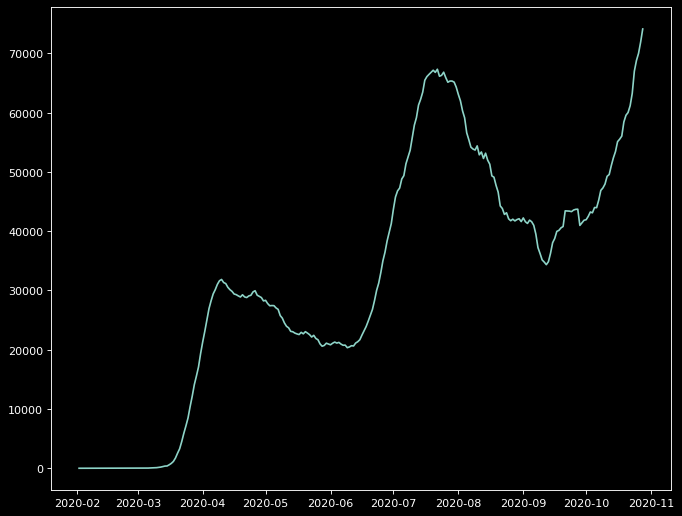

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/30/20


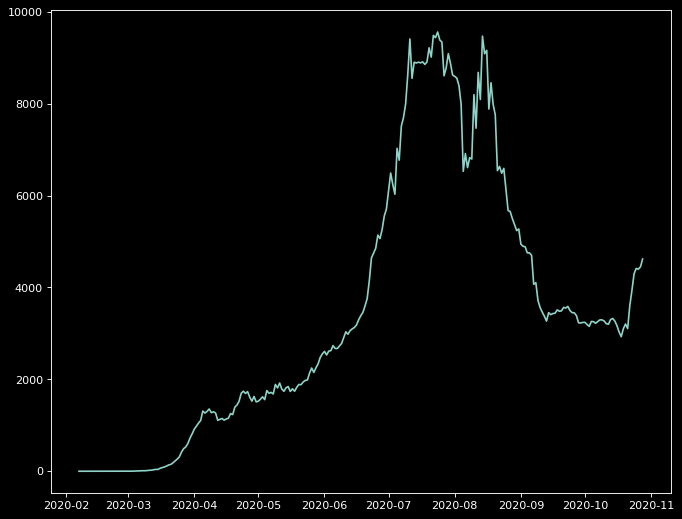

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/30/20


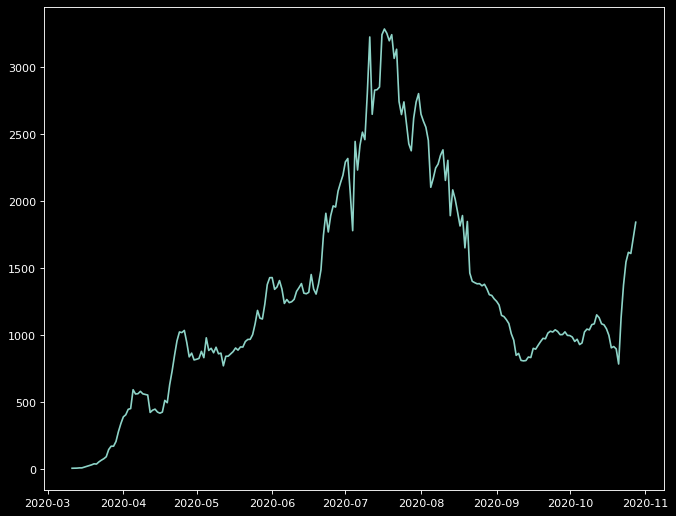

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()